# importing  the dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [58]:
data = pd.read_excel("car_data.xlsx")

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4117 non-null   object
 1   year           4117 non-null   int64 
 2   selling_price  4117 non-null   int64 
 3   km_driven      4117 non-null   int64 
 4   fuel           4117 non-null   object
 5   seller_type    4117 non-null   object
 6   transmission   4117 non-null   object
 7   owner          4117 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 257.4+ KB


In [60]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,0
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,1


In [6]:
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


# checking number of missing values

In [61]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

# check the distribution of categorical data

In [62]:
print (data.fuel.value_counts())
print (data.seller_type.value_counts())
print (data.transmission.value_counts())
print (data.owner.value_counts())

Diesel    2050
Petrol    2027
CNG         40
Name: fuel, dtype: int64
Individual    3159
Dealer         958
Name: seller_type, dtype: int64
Manual       3700
Automatic     417
Name: transmission, dtype: int64
0    2724
1    1091
2     302
Name: owner, dtype: int64


# encoding the categorical data

In [63]:
data.replace({"fuel":{'Petrol':0,'Diesel':1,'CNG':2,}}, inplace= True)
data.replace({"seller_type":{'Individual':0,'Dealer':1}}, inplace= True)
data.replace({"transmission":{'Manual':0,'Automatic':1}}, inplace= True)

In [64]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,1
...,...,...,...,...,...,...,...,...
4112,Hyundai Grand i10 CRDi Magna,2017,490000,66000,1,1,0,1
4113,Maruti Ertiga SHVS ZDI,2017,880000,64000,1,1,0,1
4114,Hyundai Santro Xing GL Plus,2013,290000,49000,0,0,0,1
4115,Tata Sumo GX TC 7 Str BSIII,2006,115999,100000,1,0,0,0


# splitting the data into train data and test data

In [65]:
y= data.selling_price #our target value
x= data.drop(["name","selling_price"], axis =1)

In [66]:
x

,year,km_driven,fuel,seller_type,transmission,owner
0,2007,70000,0,0,0,0
1,2007,50000,0,0,0,0
2,2012,100000,1,0,0,0
3,2017,46000,0,0,0,0
4,2014,141000,1,0,0,1
...,...,...,...,...,...,...
4112,2017,66000,1,1,0,1
4113,2017,64000,1,1,0,1
4114,2013,49000,0,0,0,1
4115,2006,100000,1,0,0,0


In [67]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4112    490000
4113    880000
4114    290000
4115    115999
4116    685000
Name: selling_price, Length: 4117, dtype: int64

In [68]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.1,random_state=2)

# model training

In [69]:
lr=LinearRegression()

In [70]:
lr.fit(x_train, y_train)


LinearRegression()

# model evaluation

In [85]:
train_y_pred= lr.predict(x_train)

In [87]:
error_score= metrics.r2_score(y_train,train_y_pred)
print ("R squared error: " , error_score)

R squared error:  0.4326986156670941


# visualize actual price and prediced price

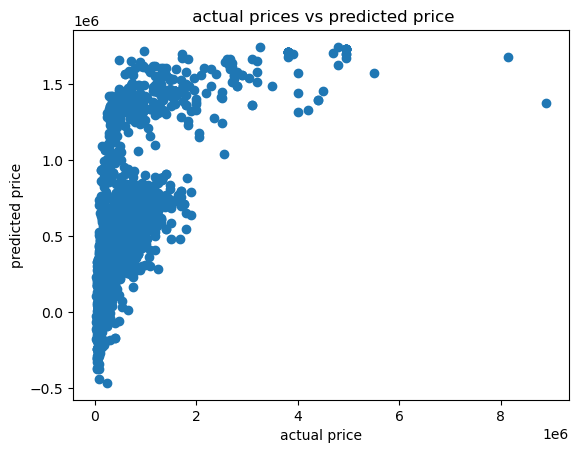

In [88]:
plt.scatter(y_train, train_y_pred)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title(" actual prices vs predicted price")
plt.show()

In [90]:
test_y_pred= lr.predict(x_test)

In [91]:
error_score= metrics.r2_score(y_test,test_y_pred)
print ("R squared error: " , error_score)

R squared error:  0.4625139468241759


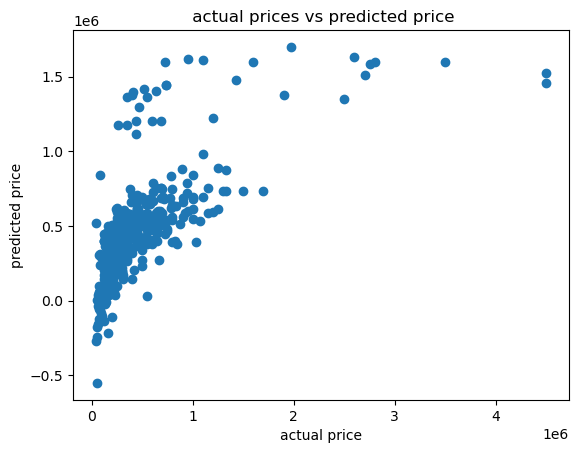

In [92]:
plt.scatter(y_test, test_y_pred)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title(" actual prices vs predicted price")
plt.show()

# lasso regression

R squared error:  0.43269861560952216


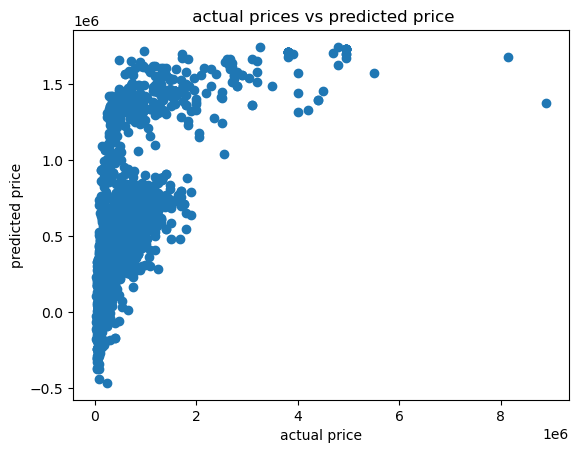

In [94]:
lsr=Lasso()

lsr.fit(x_train, y_train)


# model evaluation

train_y_pred= lsr.predict(x_train)

error_score= metrics.r2_score(y_train,train_y_pred)
print ("R squared error: " , error_score)

# visualize actual price and prediced price

plt.scatter(y_train, train_y_pred)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title(" actual prices vs predicted price")
plt.show()



R squared error:  0.4625143785783261


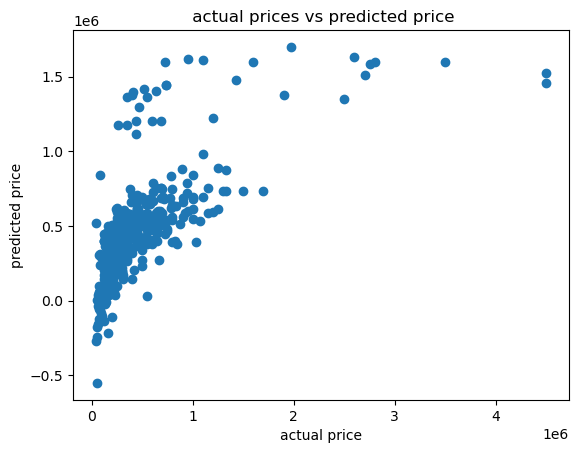

In [96]:
test_y_pred= lsr.predict(x_test)

error_score= metrics.r2_score(y_test,test_y_pred)
print ("R squared error: " , error_score)

plt.scatter(y_test, test_y_pred)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title(" actual prices vs predicted price")
plt.show()